In [1]:
import numpy as np

import matplotlib.pyplot as plt

import scipy.signal

In [2]:
def theta(x, t, k):
    return (k * x + 4 * k**3 * t)

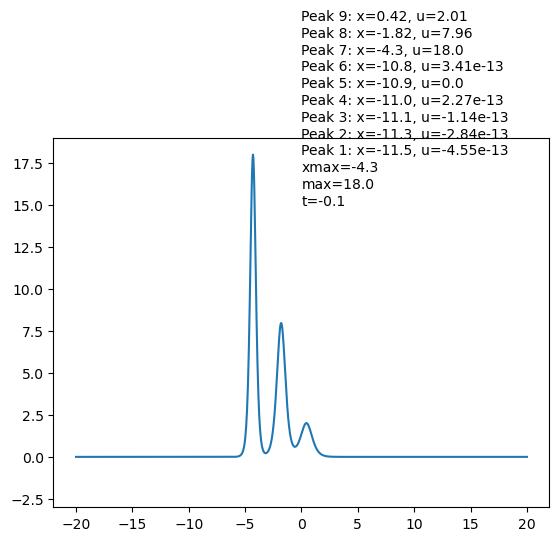

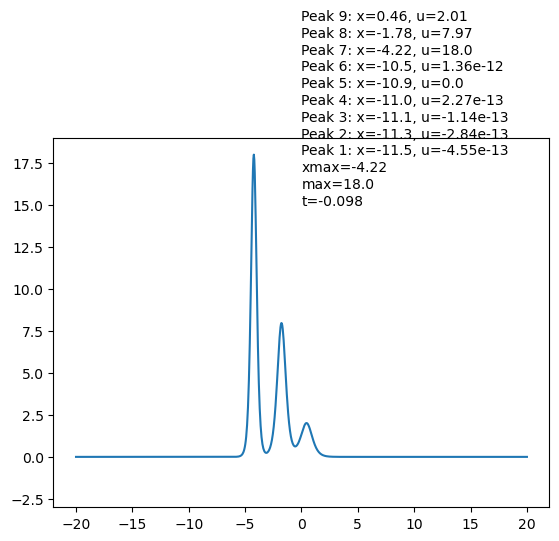

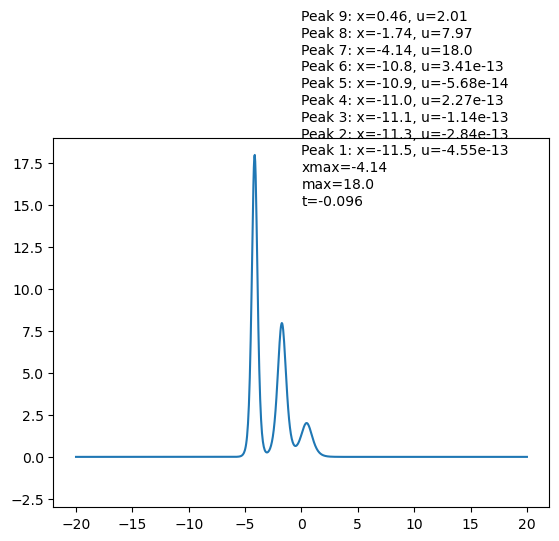

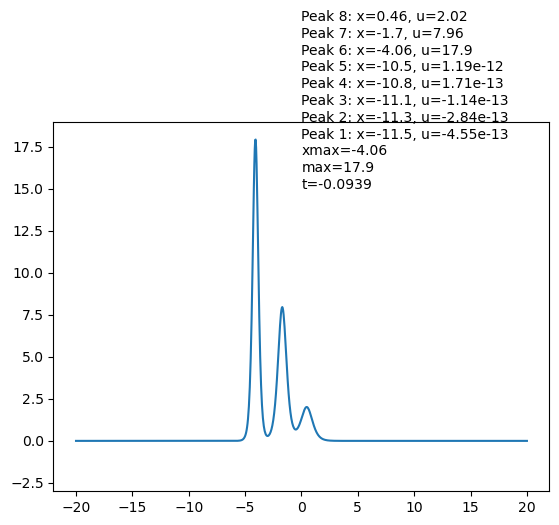

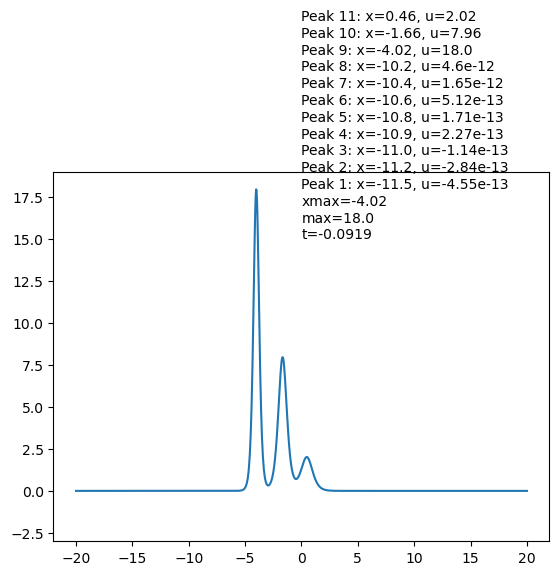

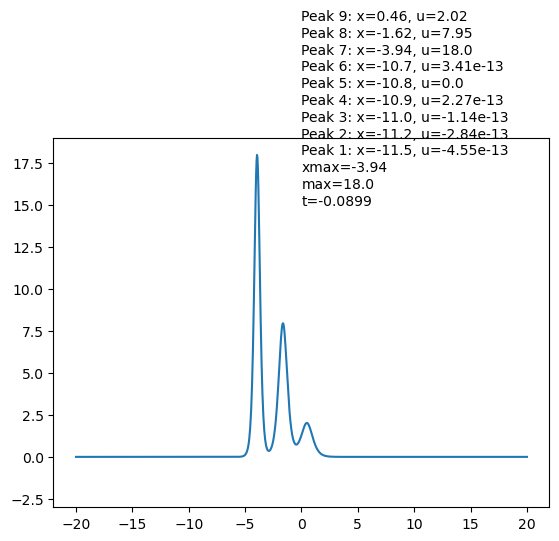

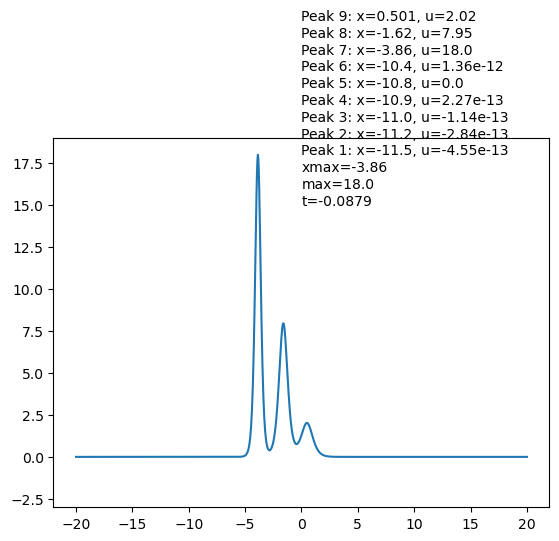

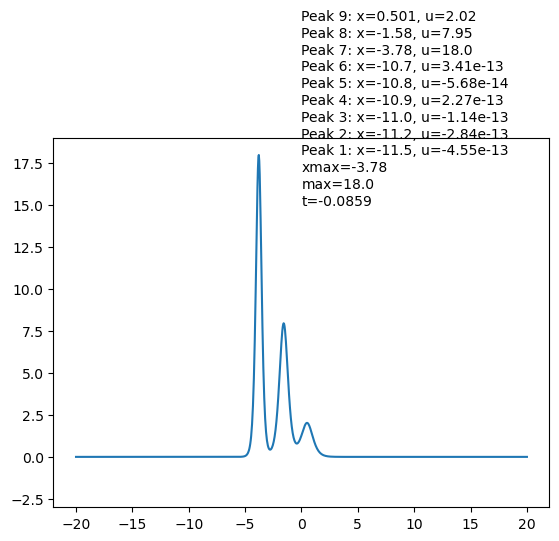

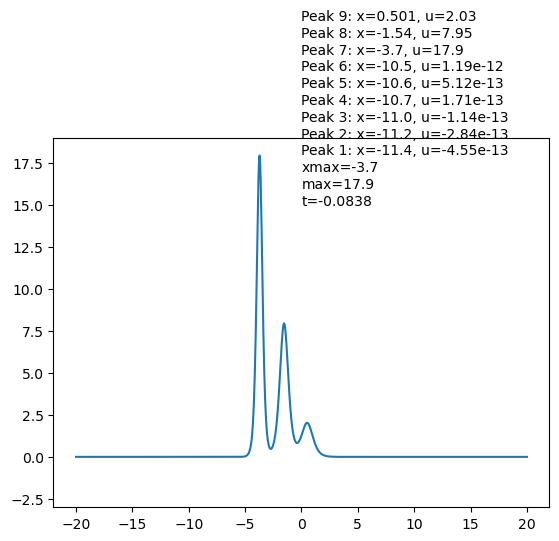

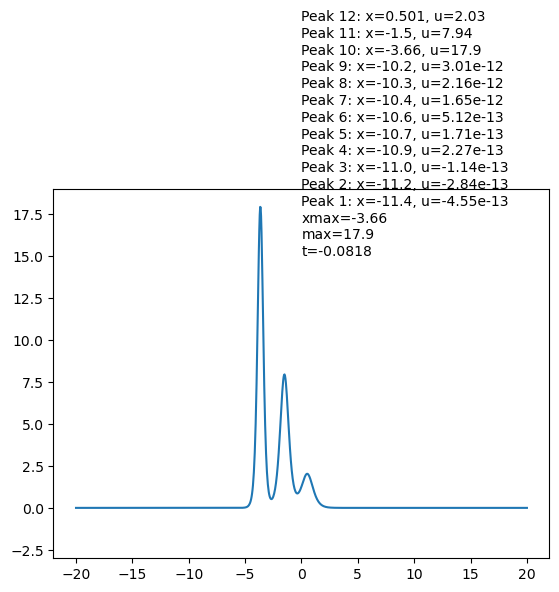

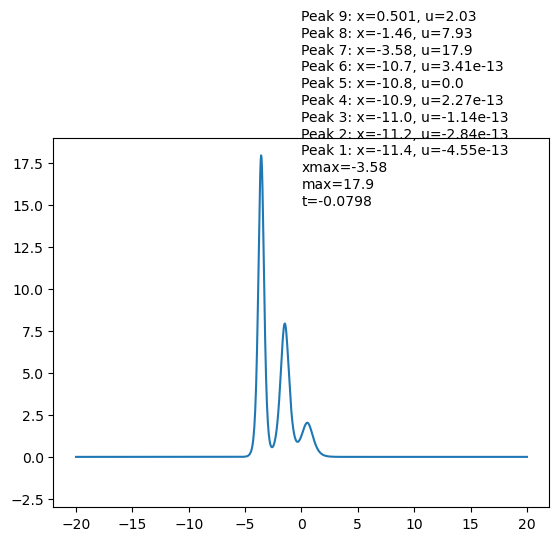

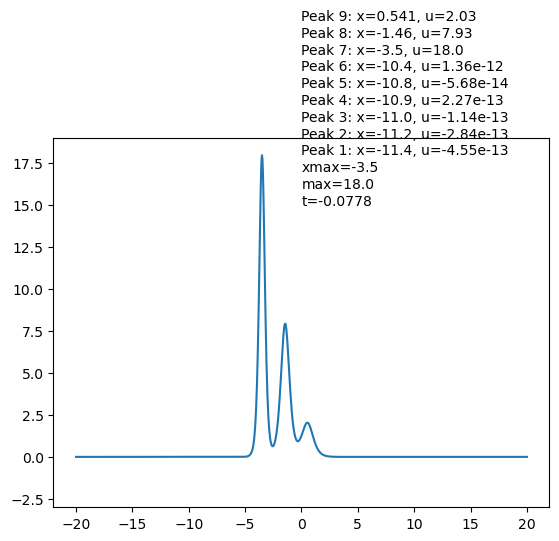

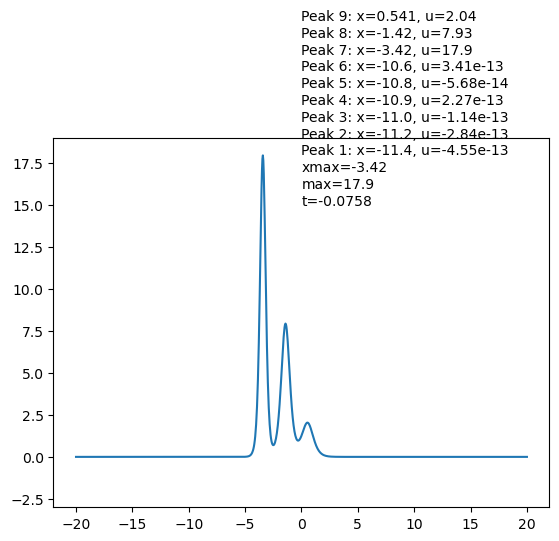

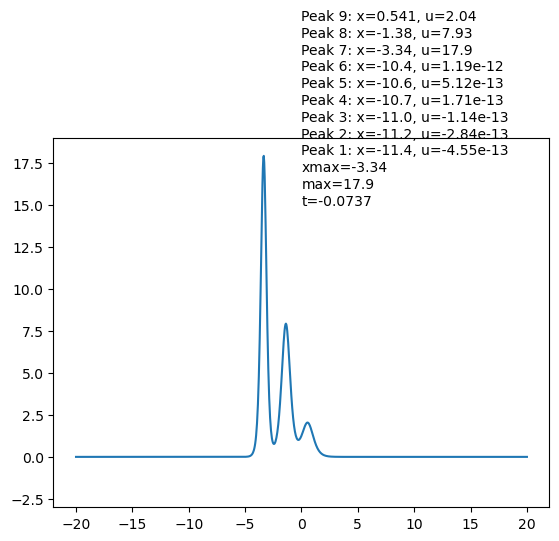

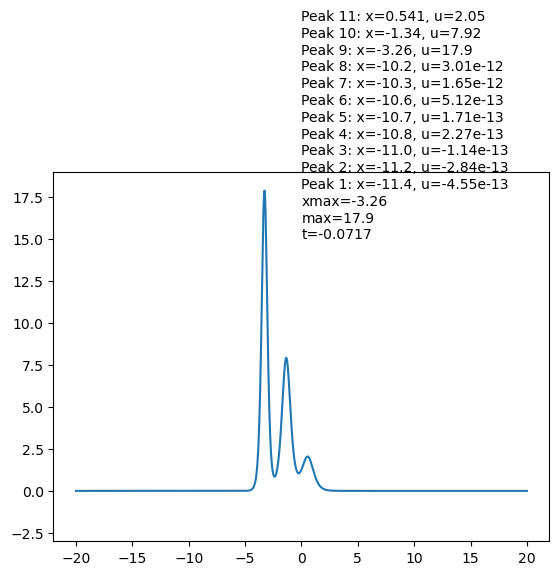

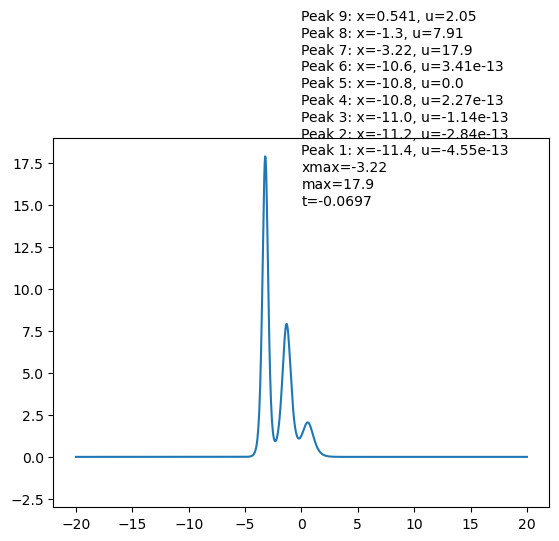

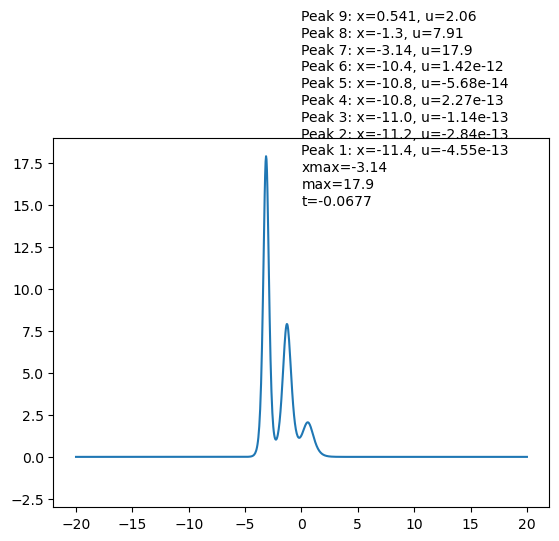

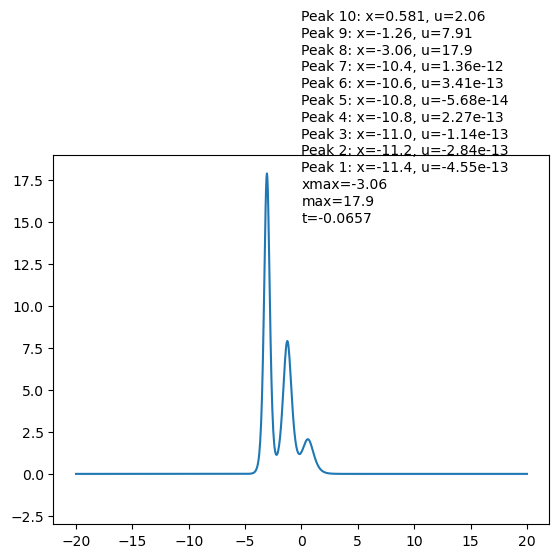

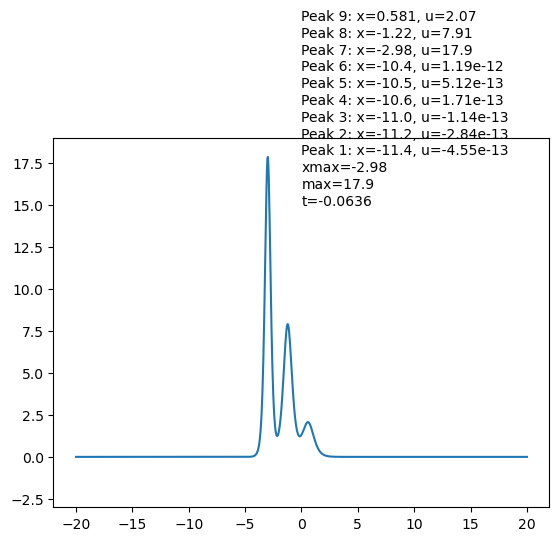

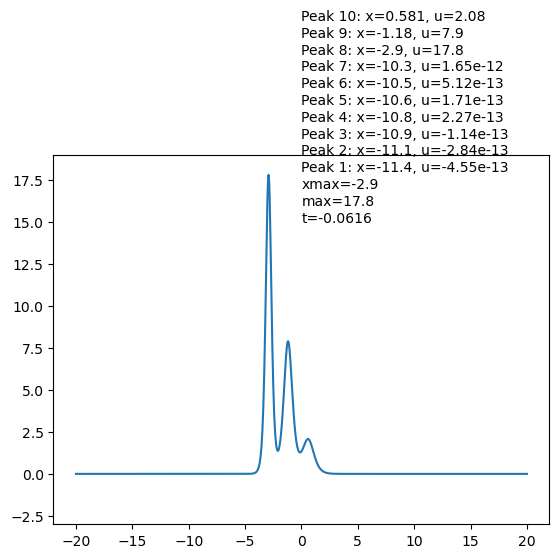

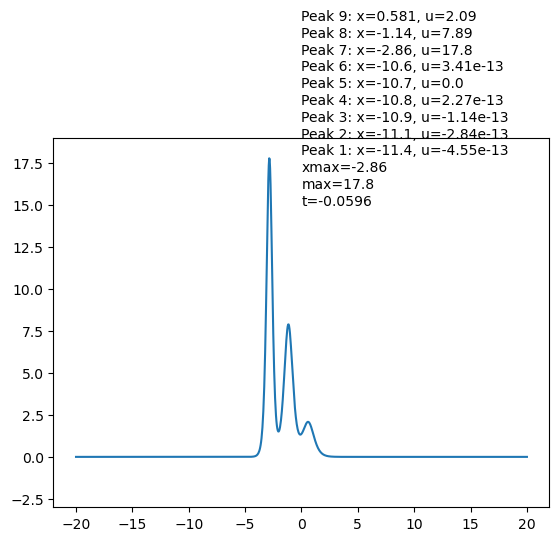

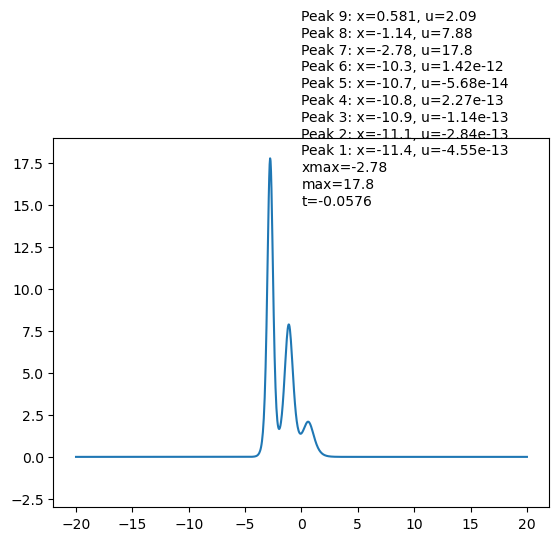

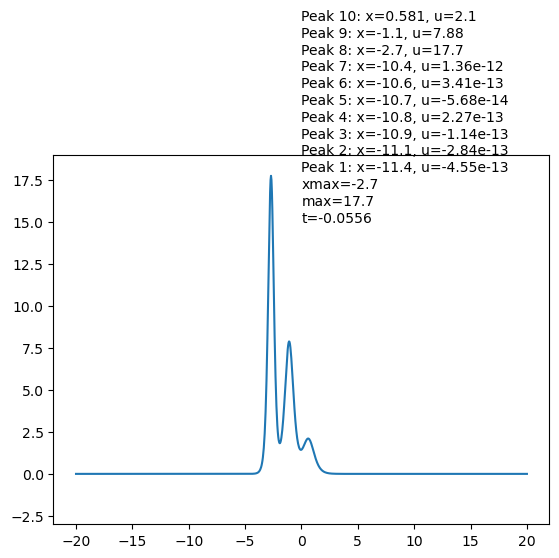

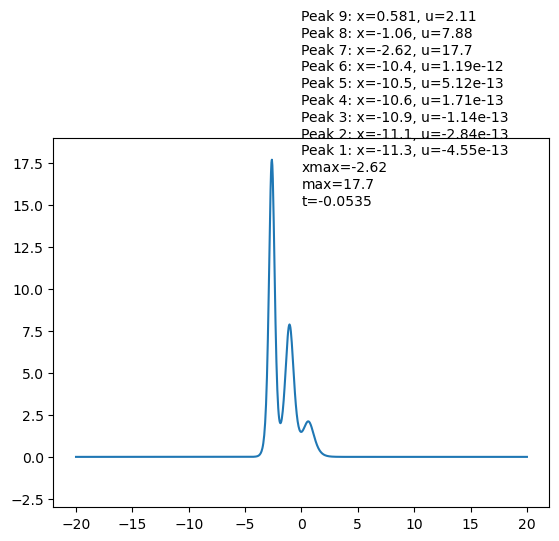

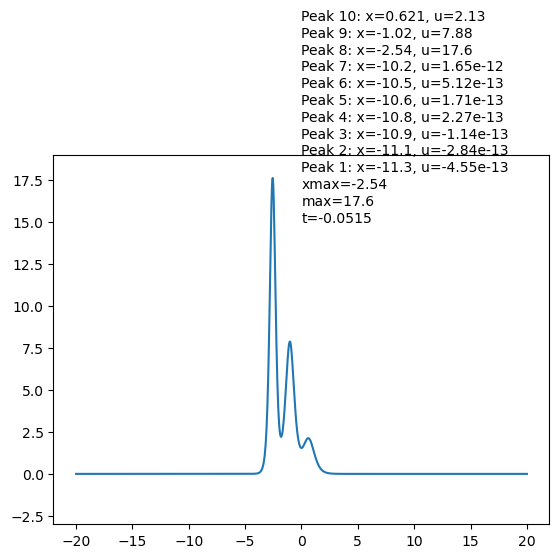

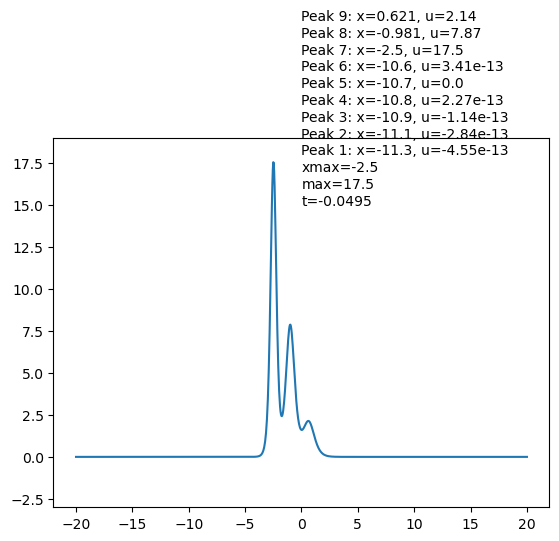

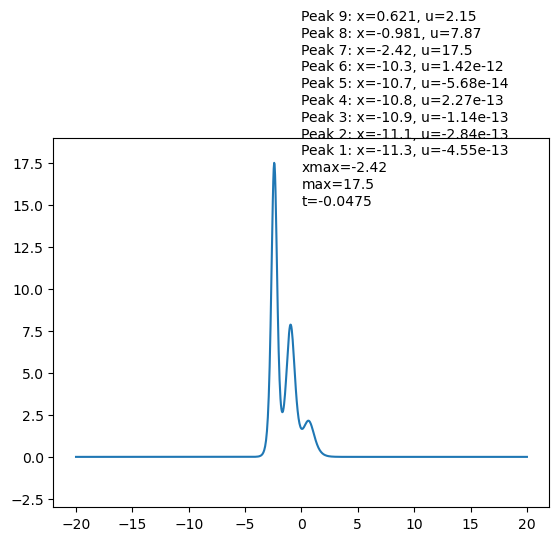

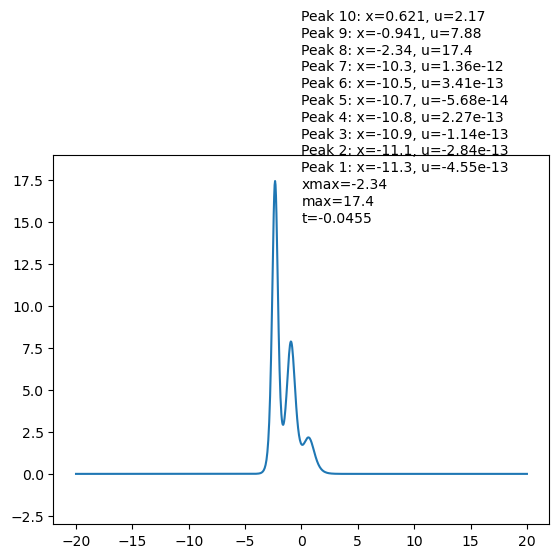

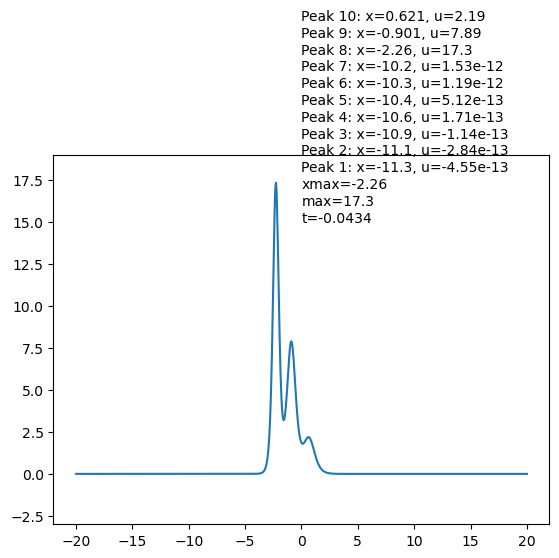

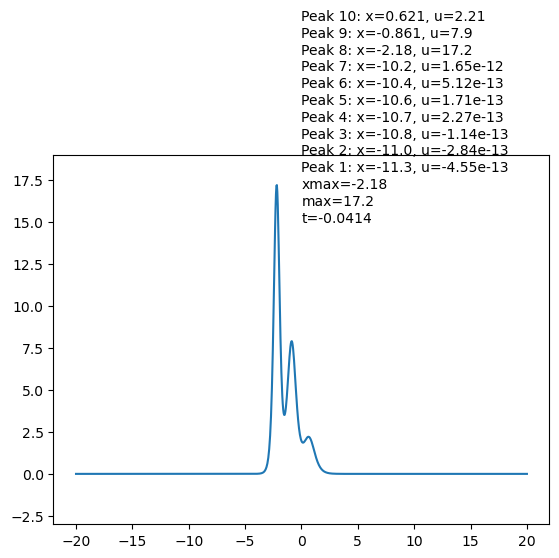

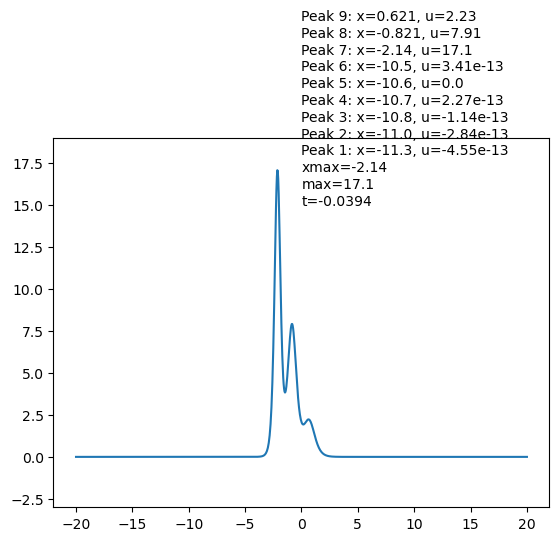

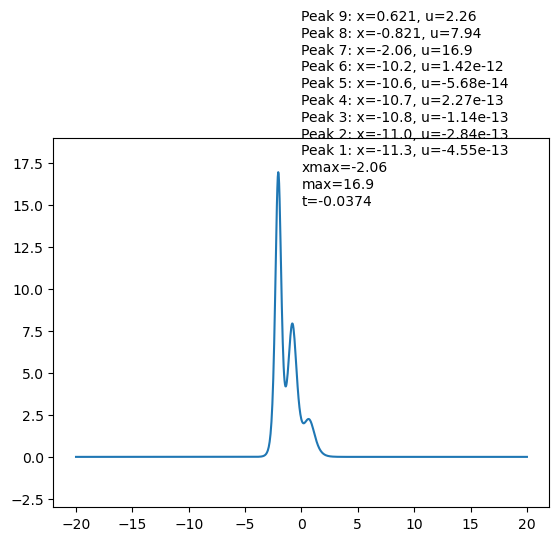

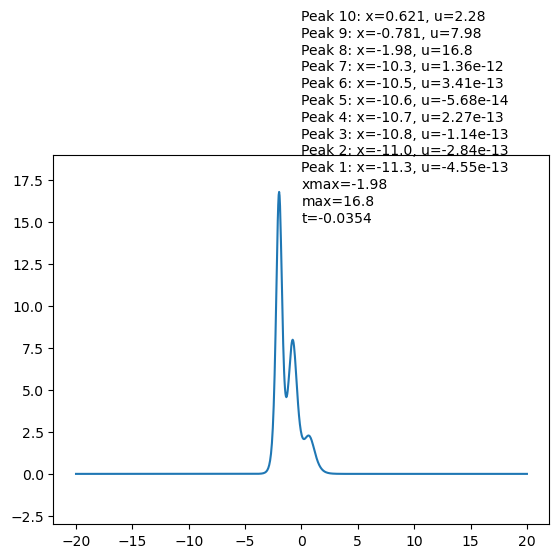

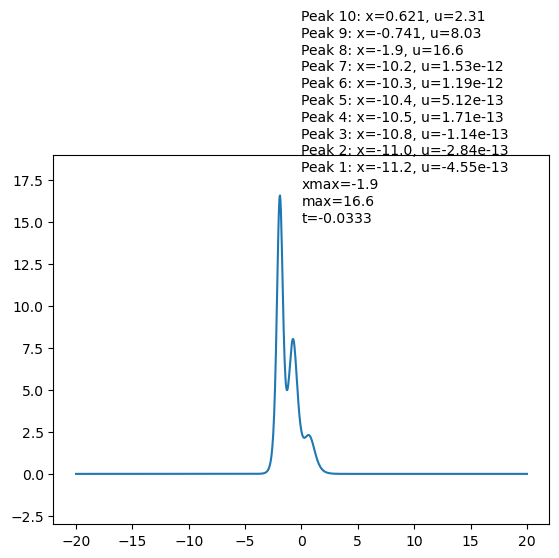

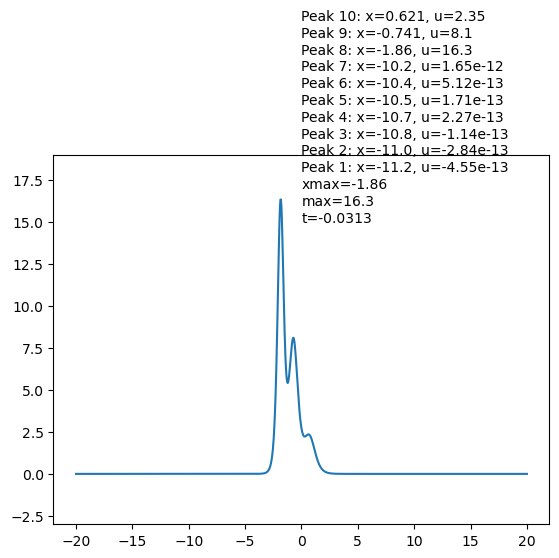

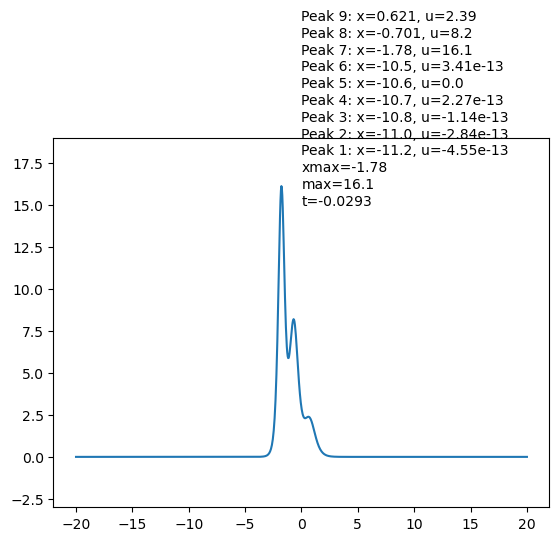

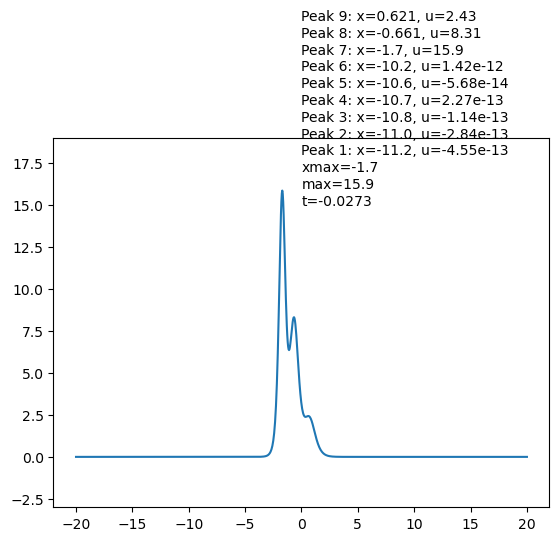

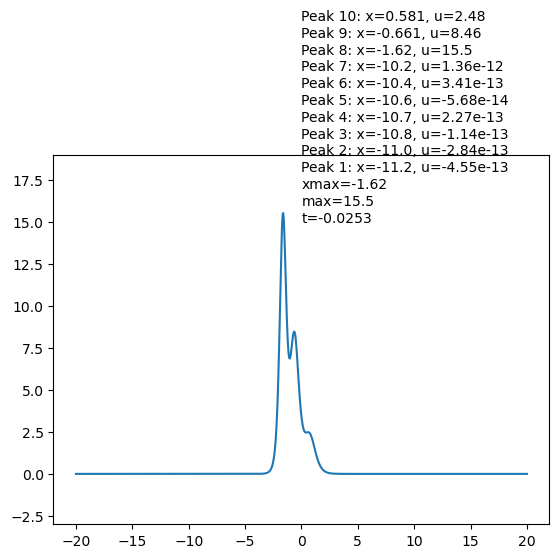

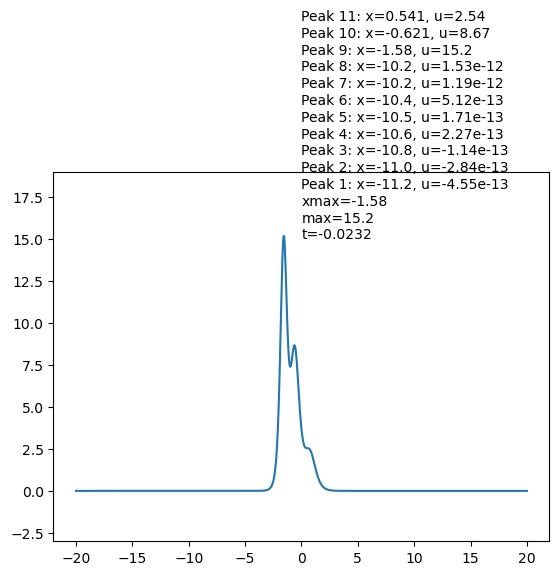

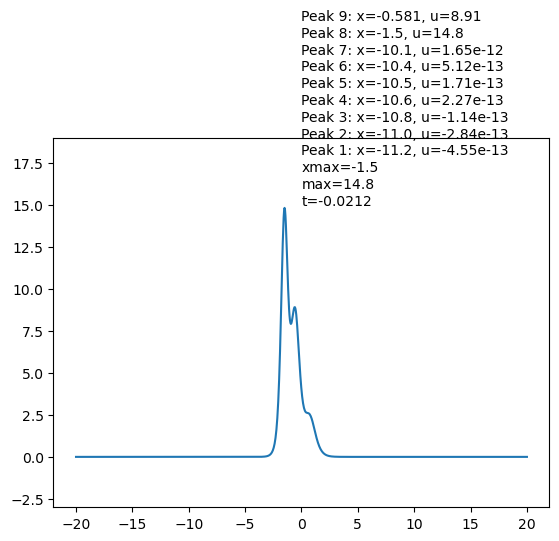

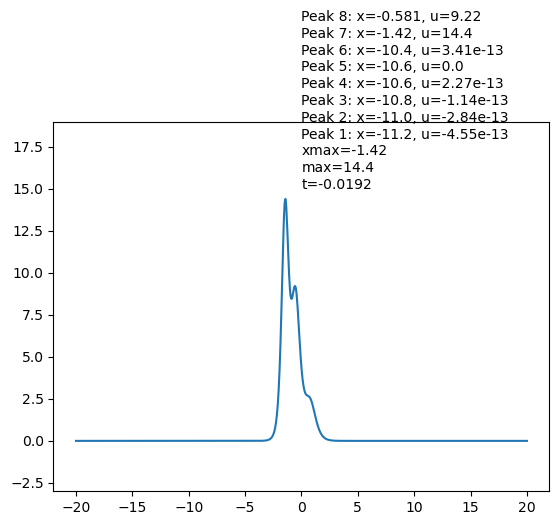

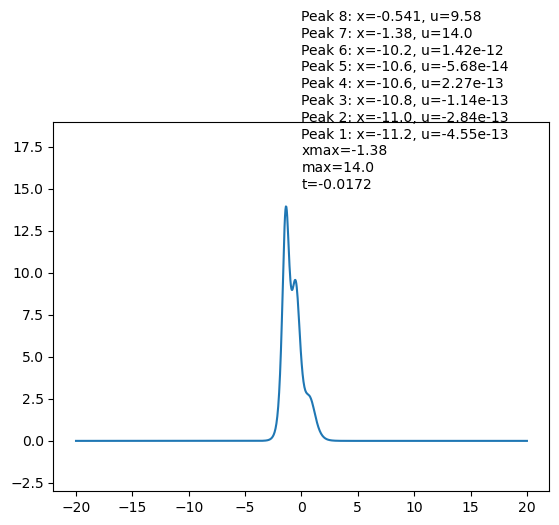

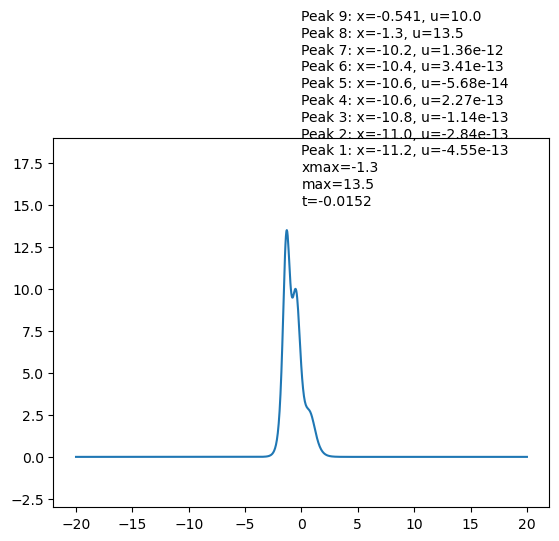

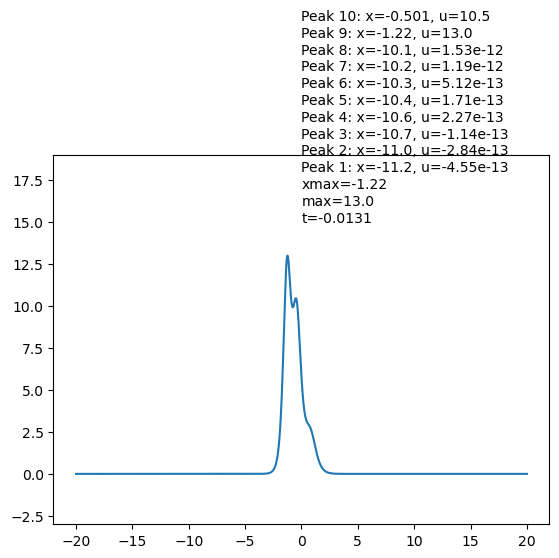

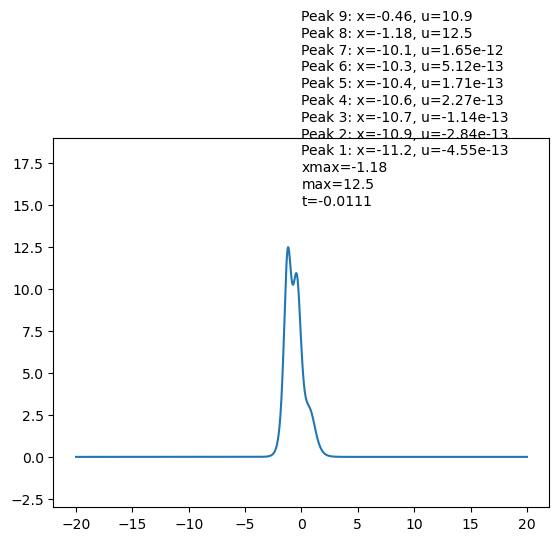

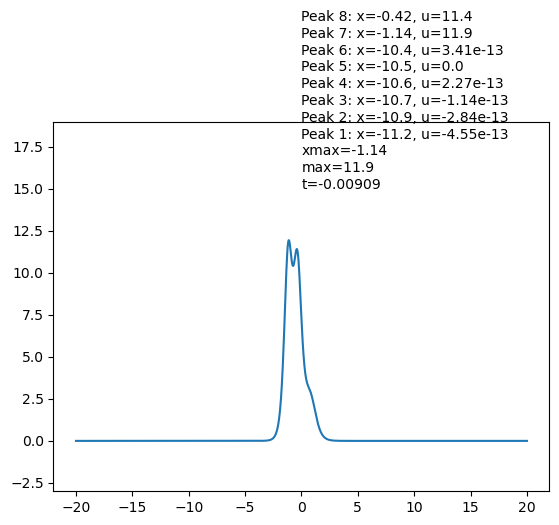

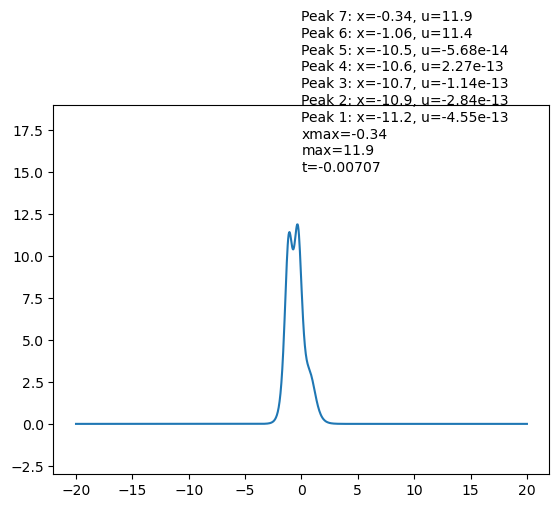

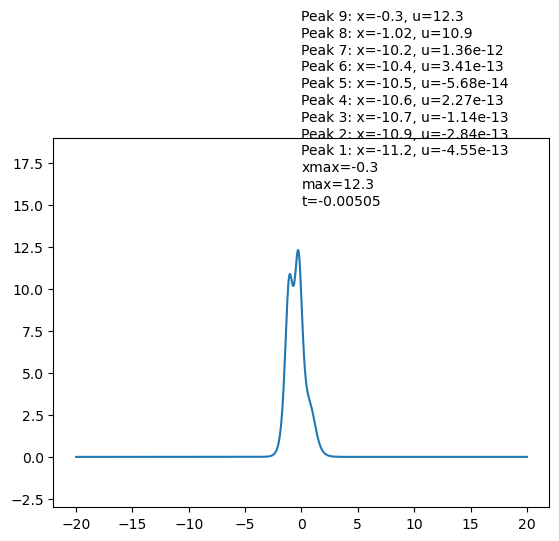

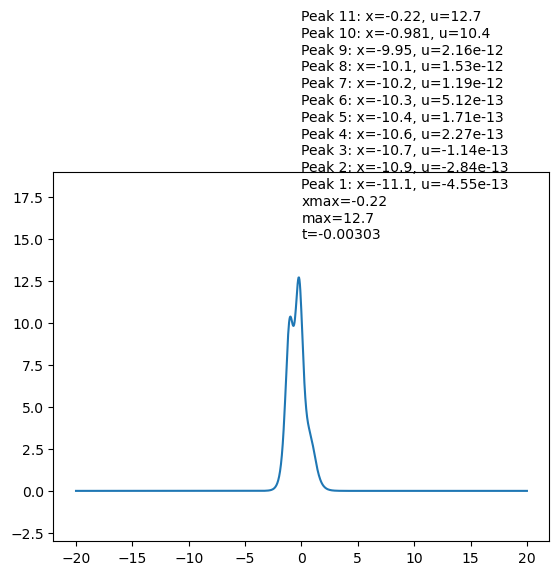

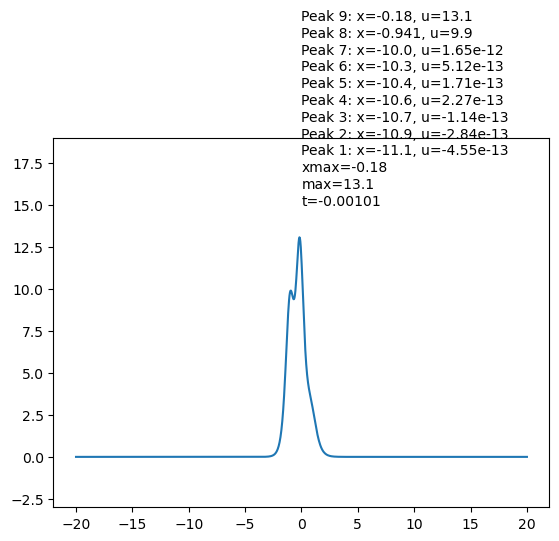

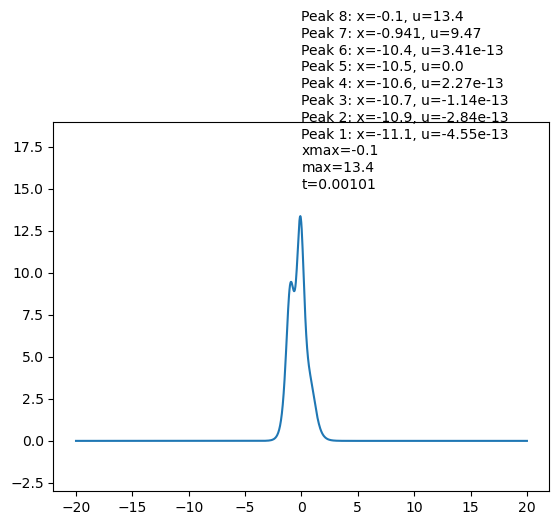

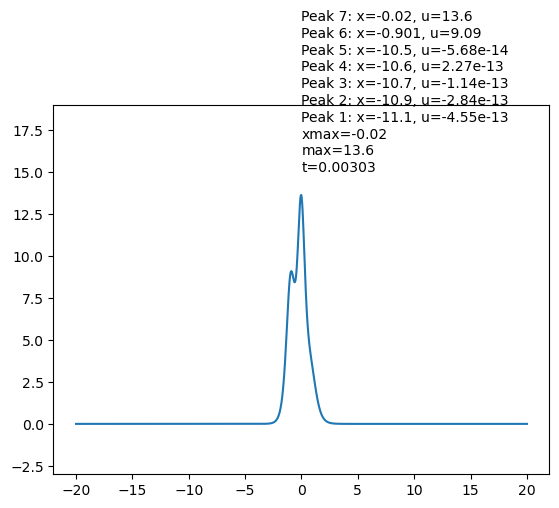

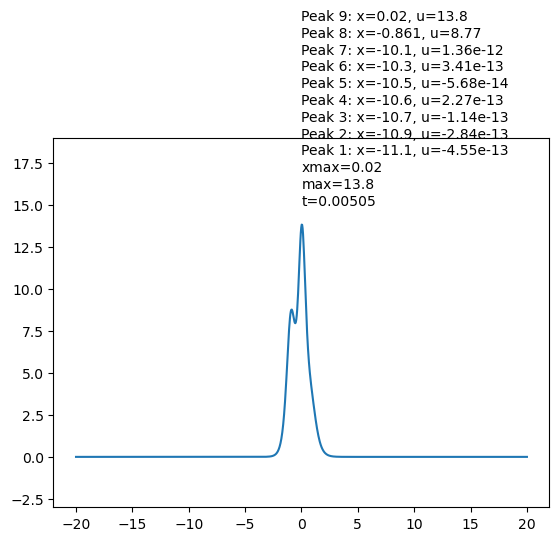

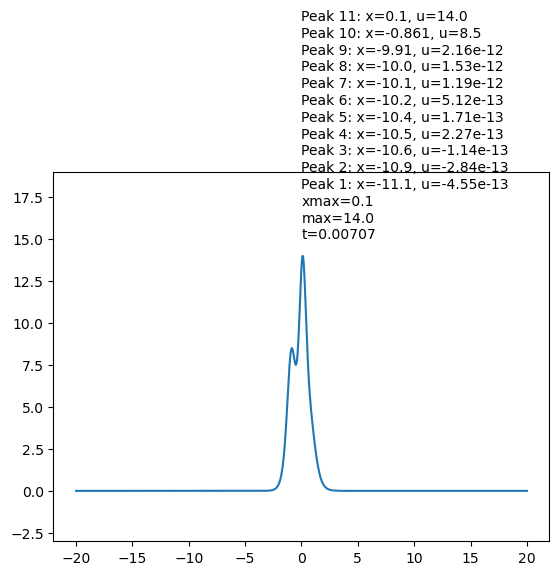

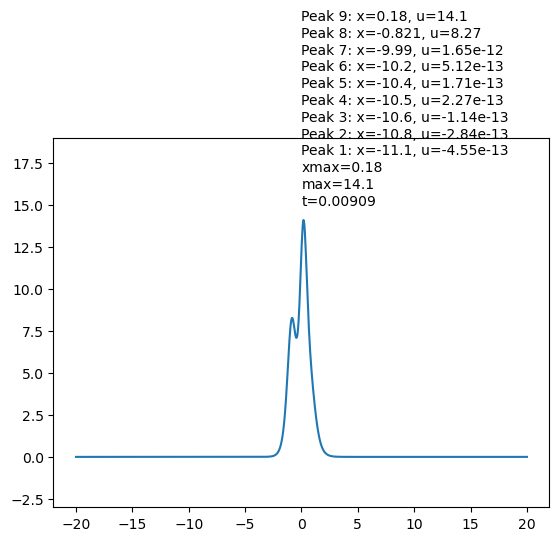

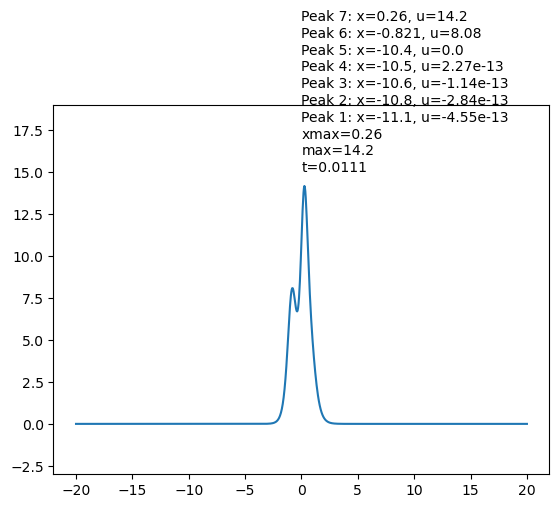

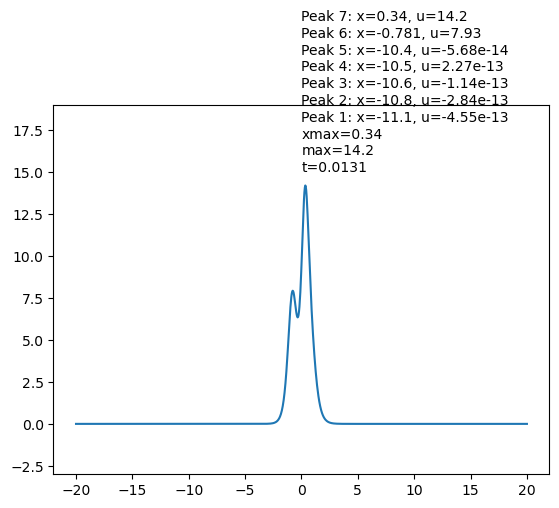

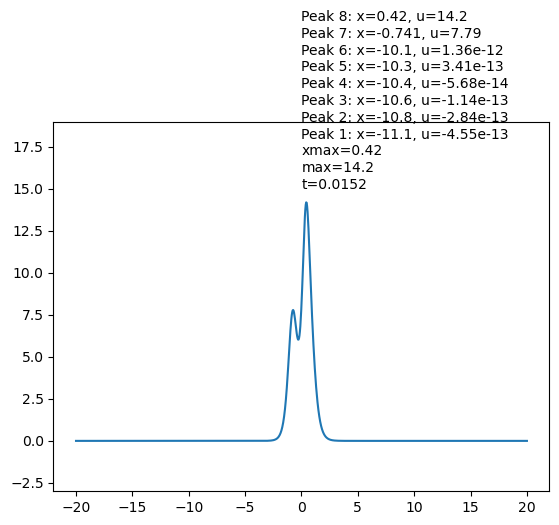

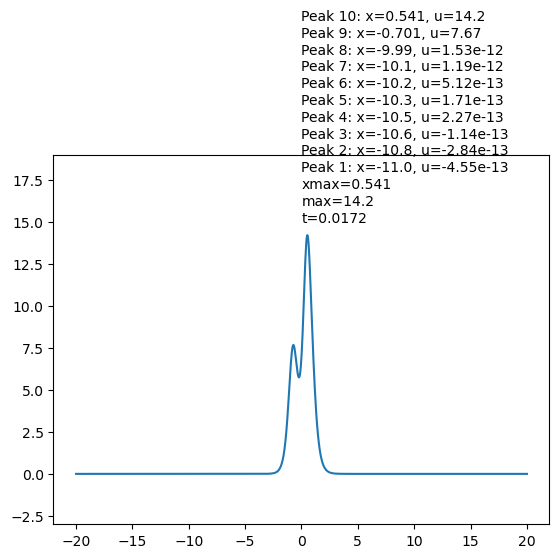

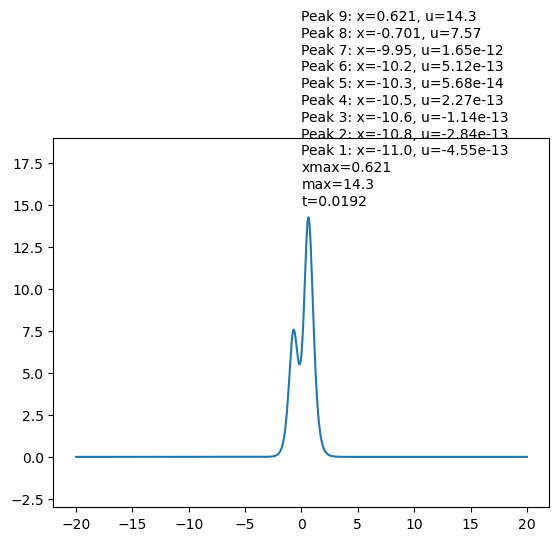

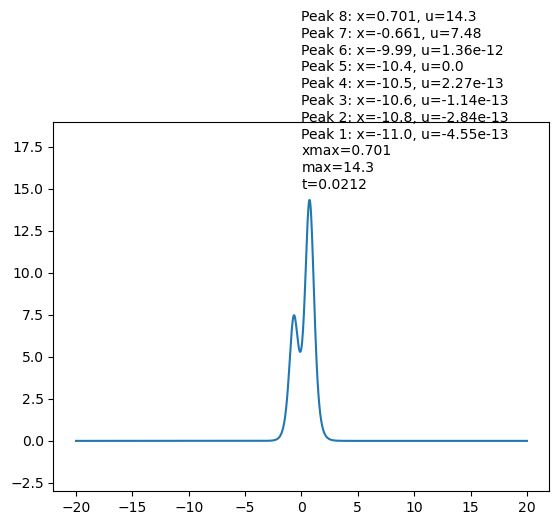

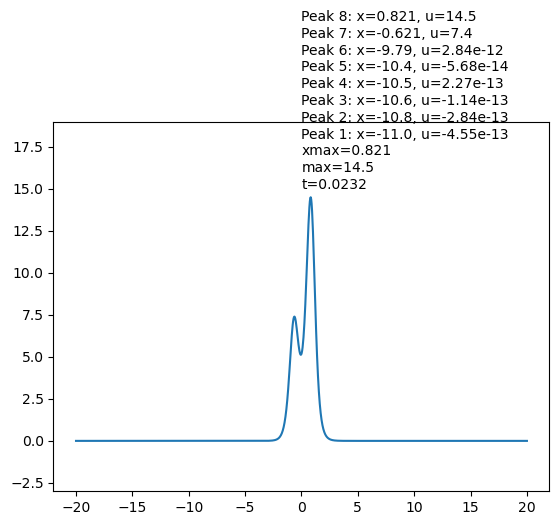

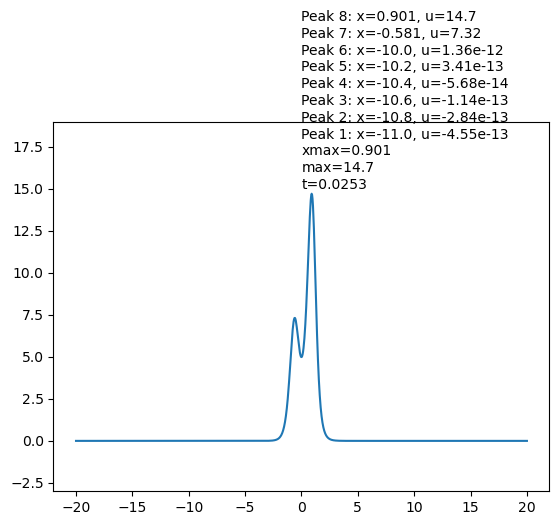

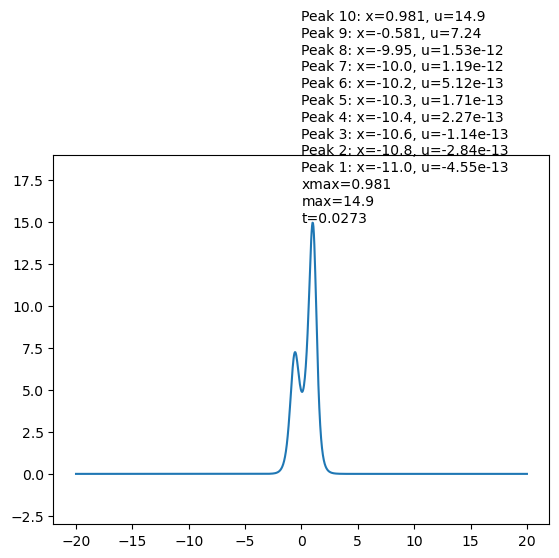

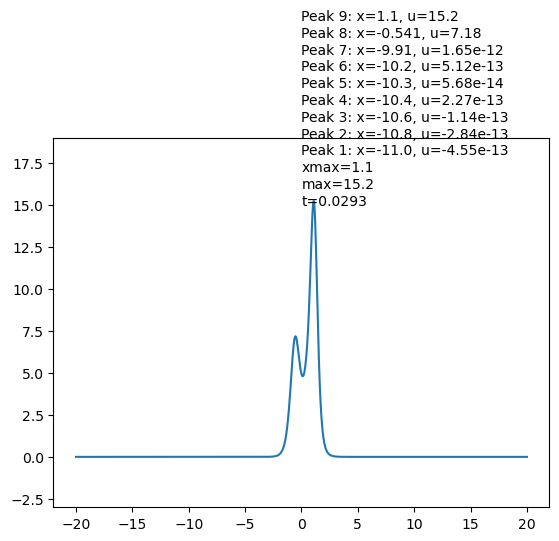

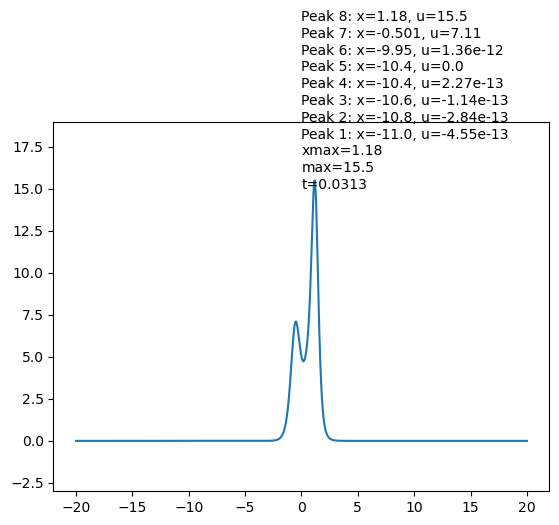

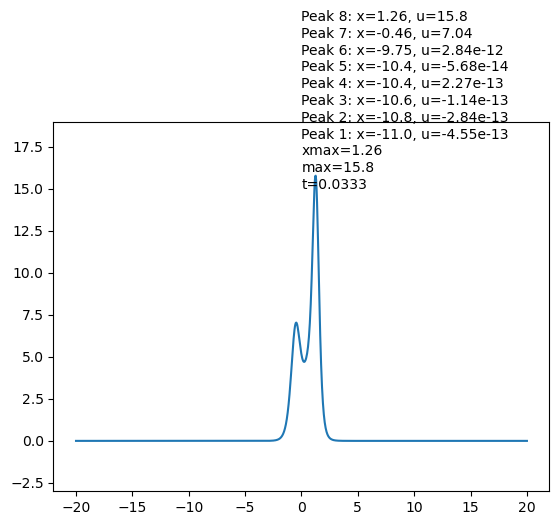

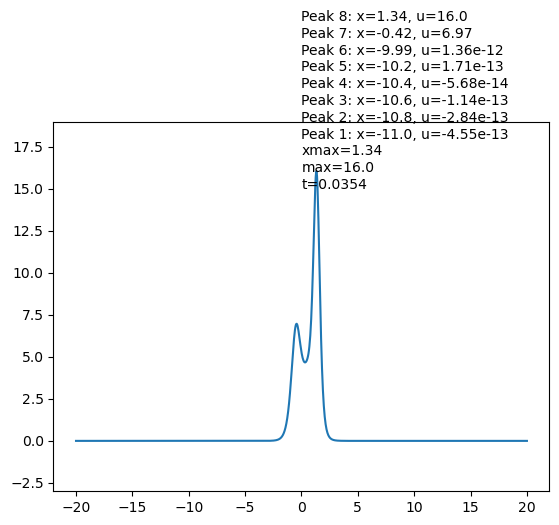

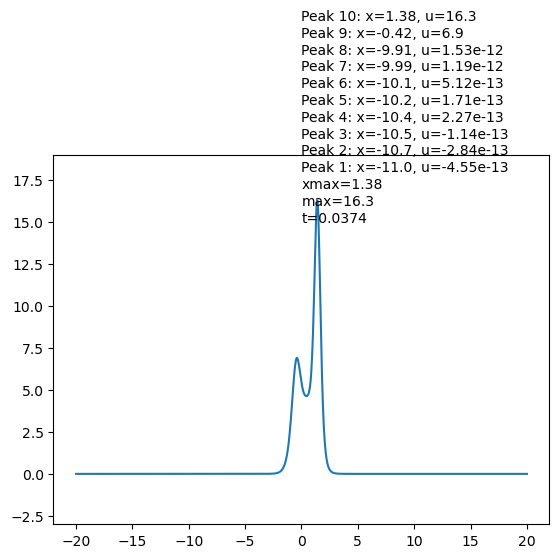

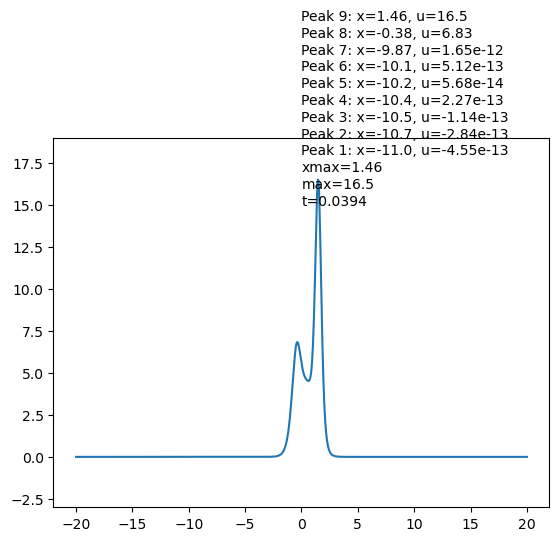

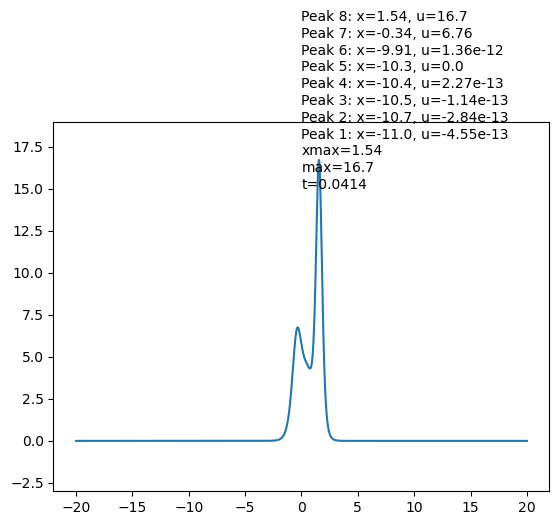

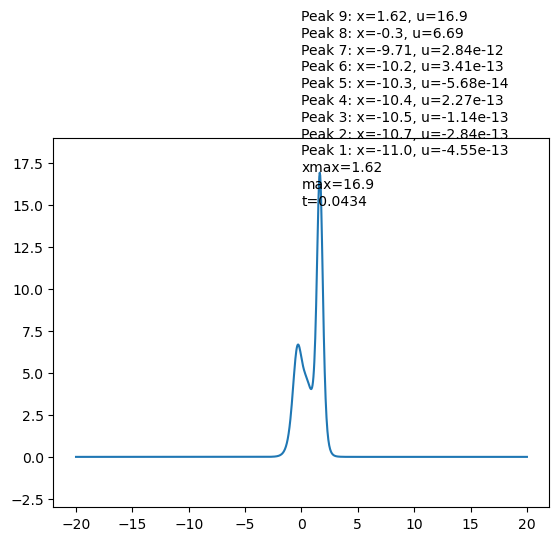

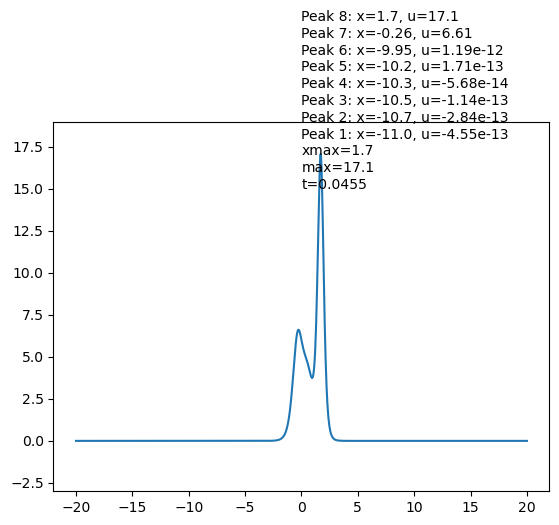

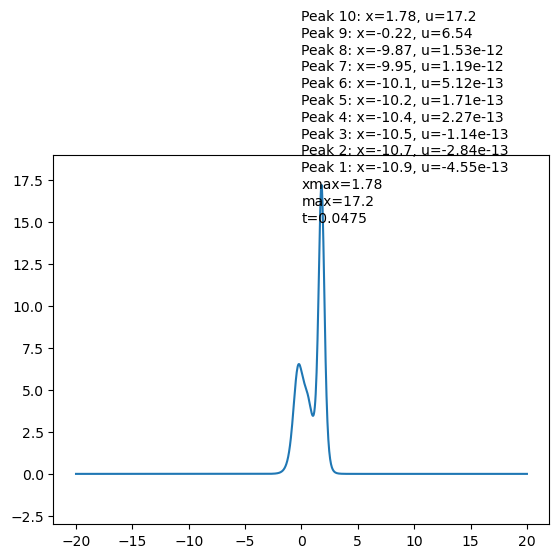

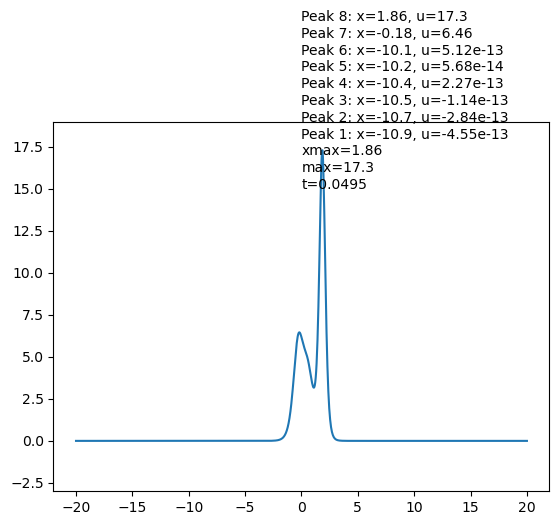

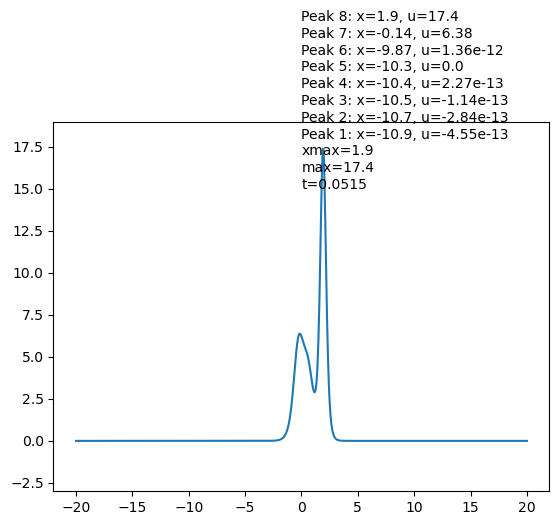

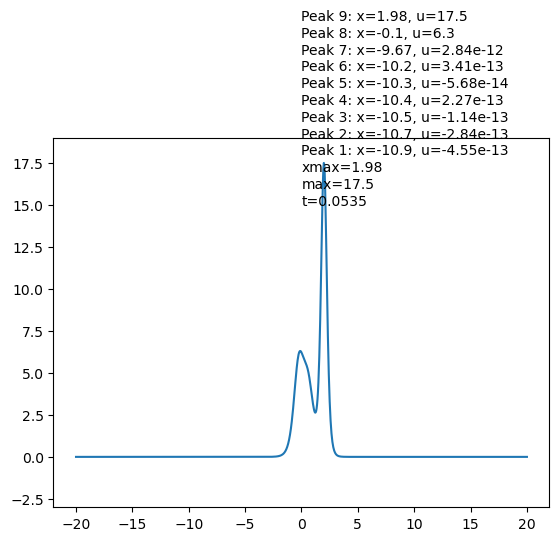

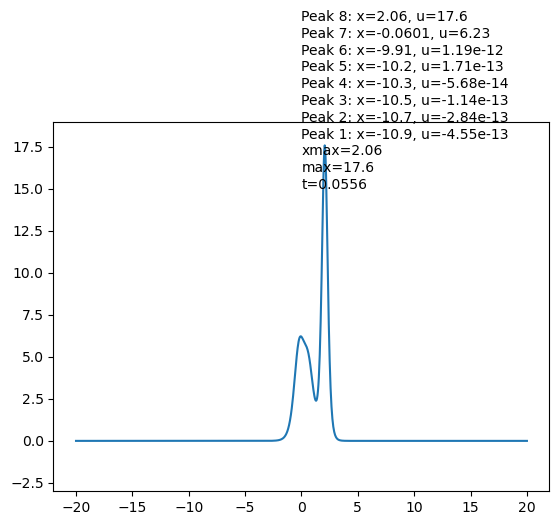

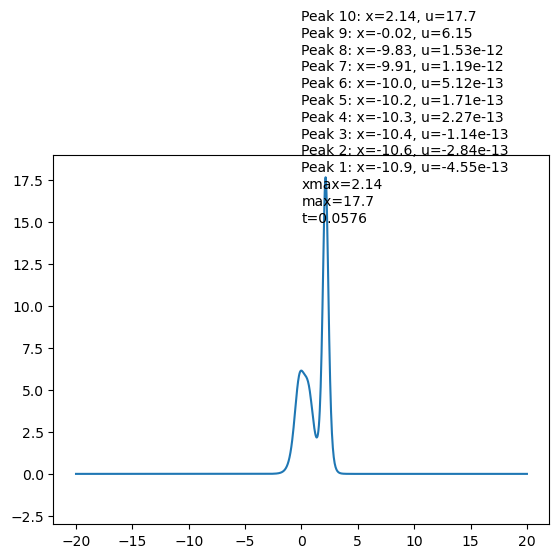

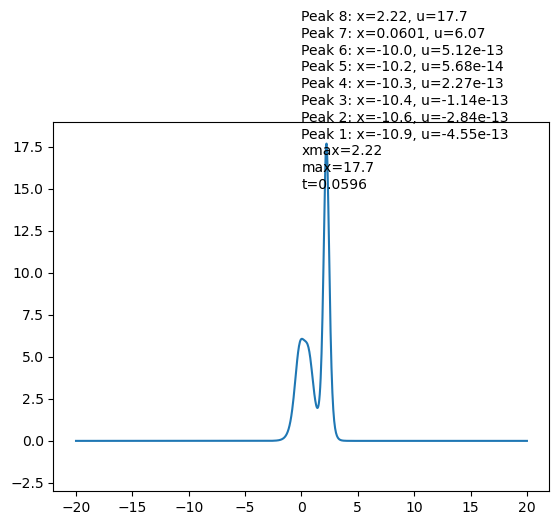

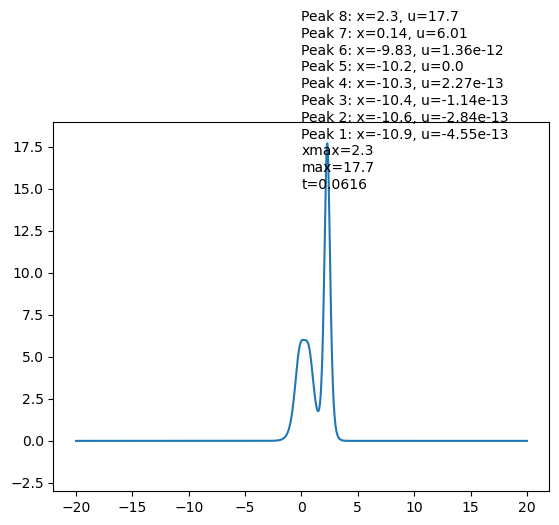

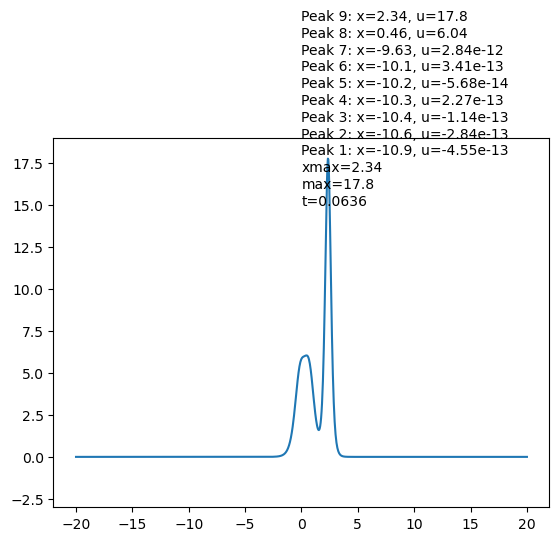

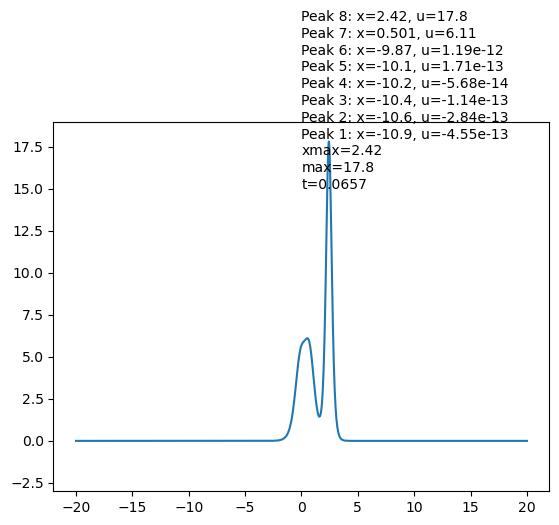

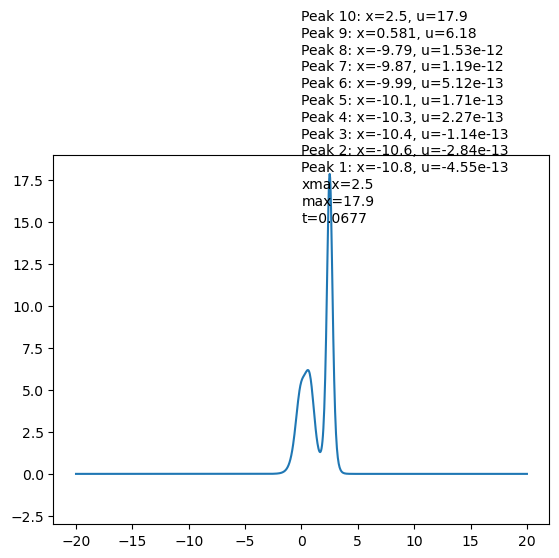

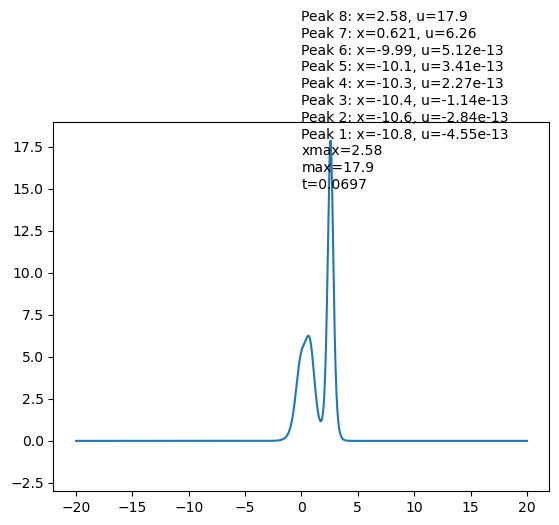

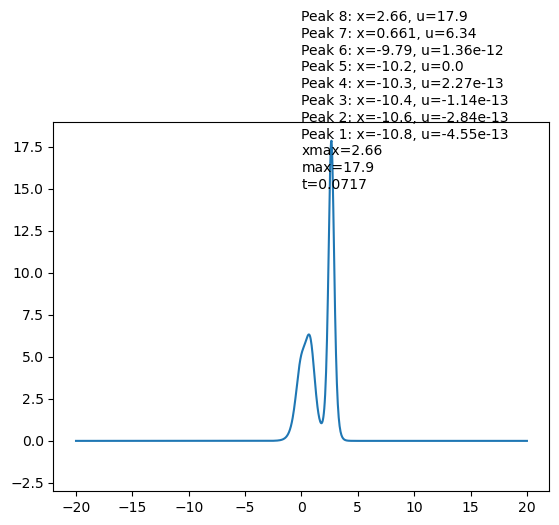

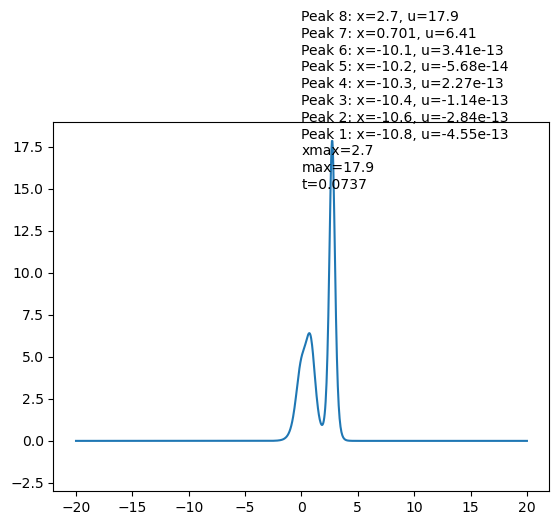

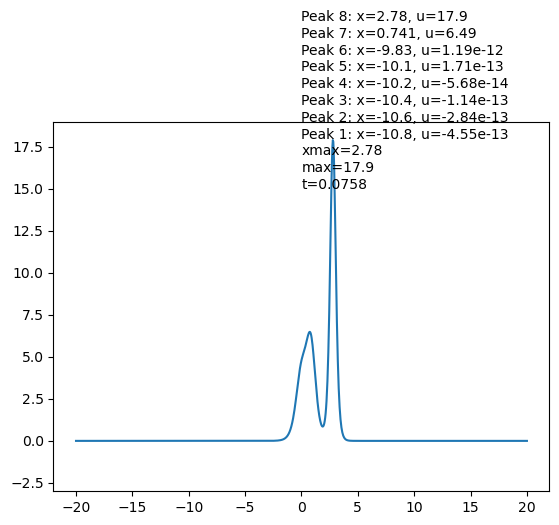

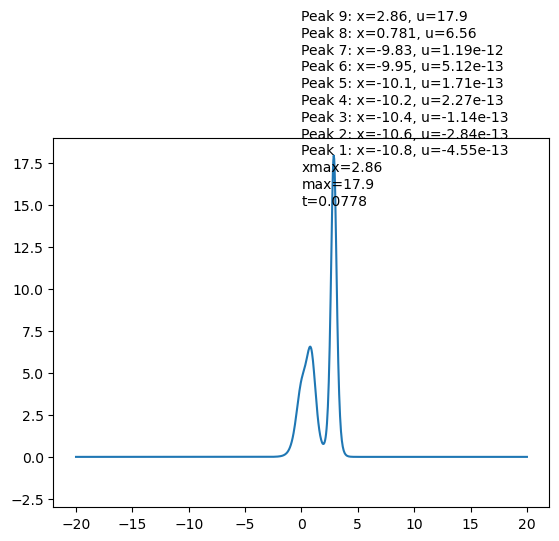

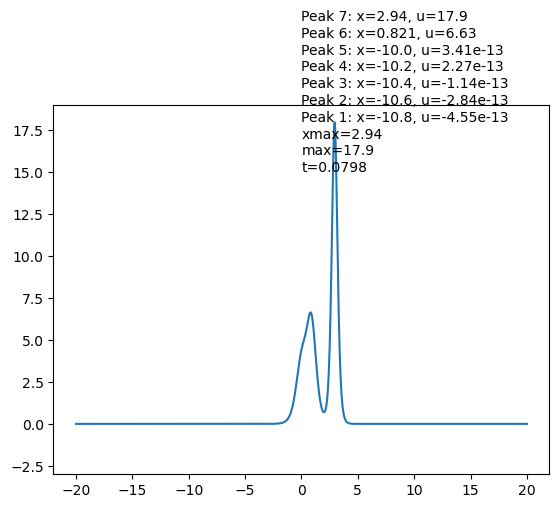

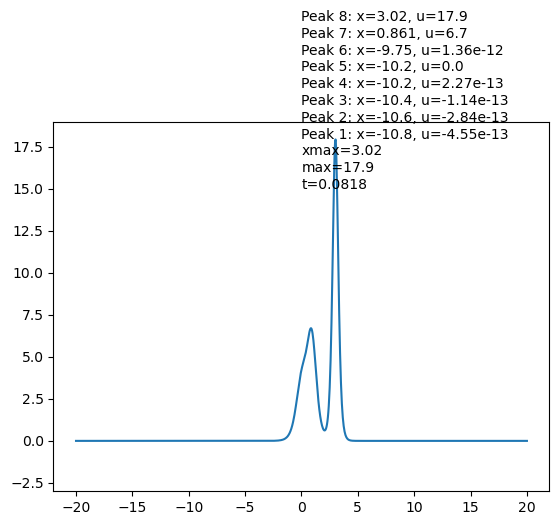

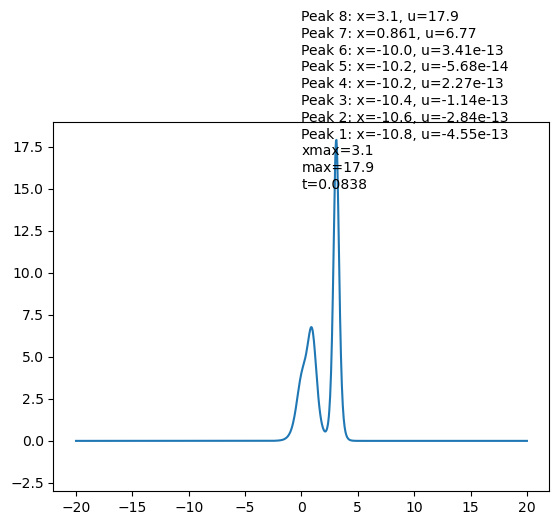

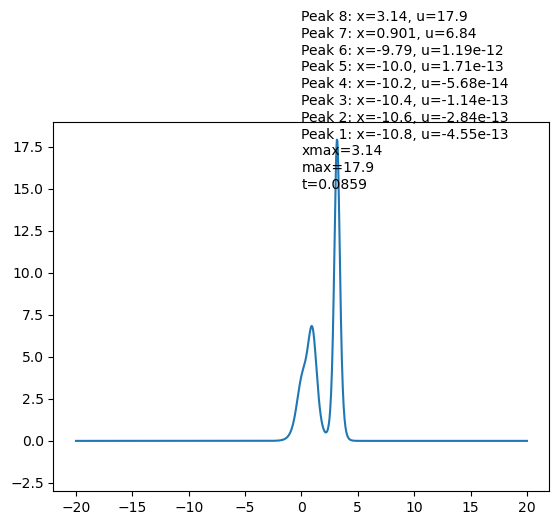

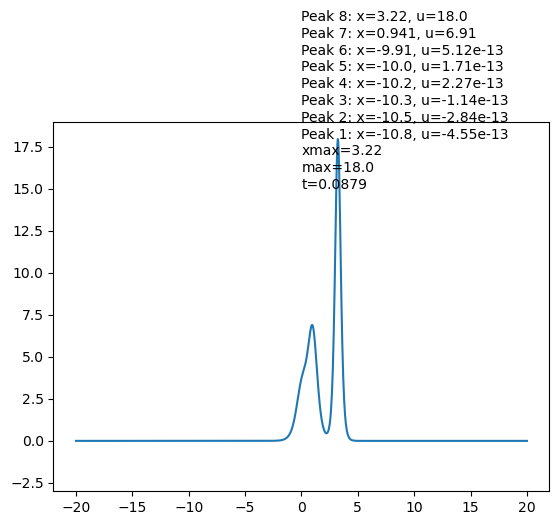

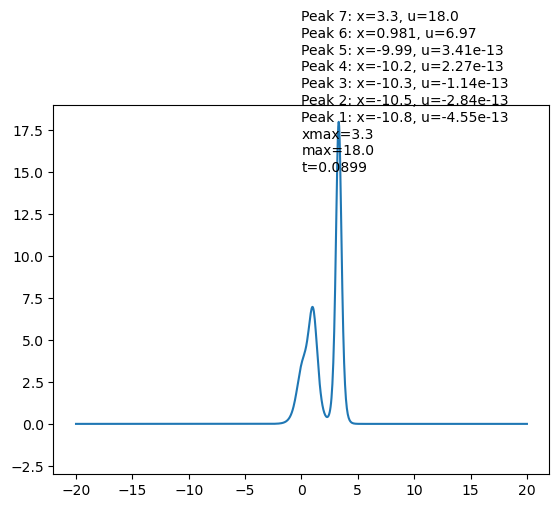

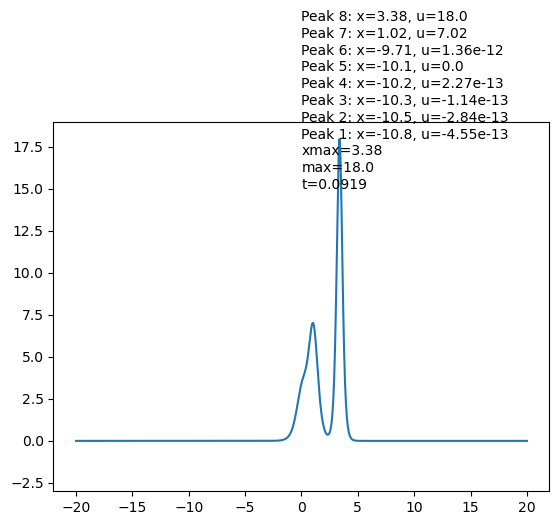

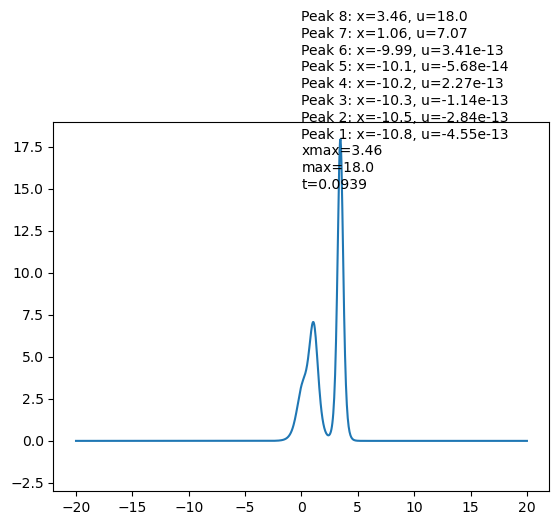

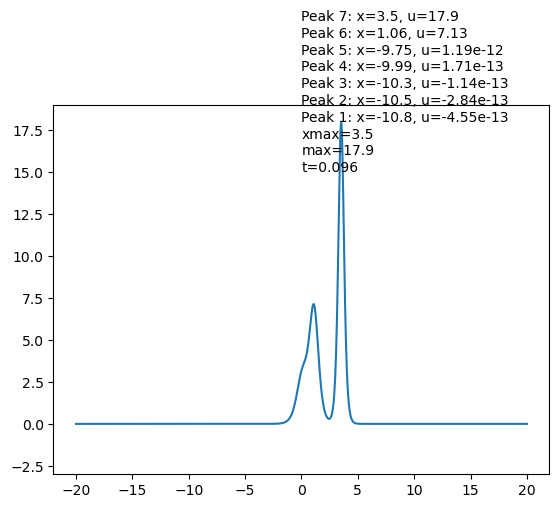

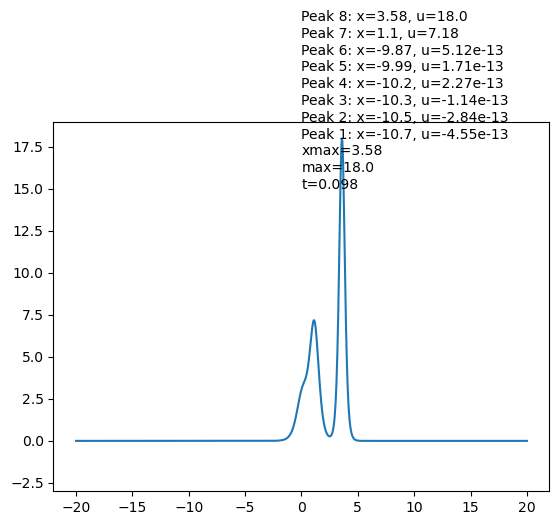

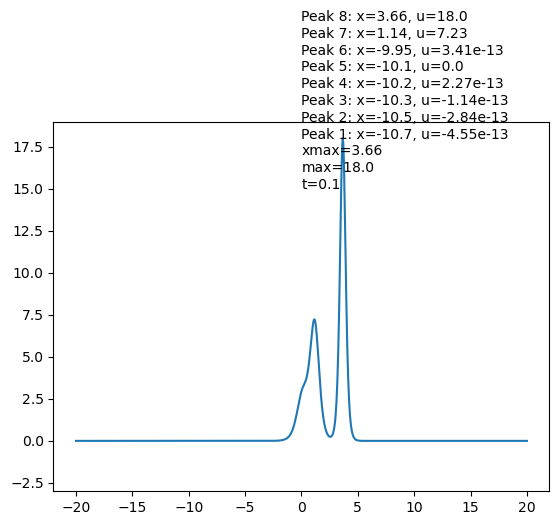

In [4]:
kappa1 = 3; gamma1 = 3;
kappa2 = 2; gamma2 = 4;
kappa3 = 1; gamma3 = 5

tarr = np.linspace(-0.1, 0.1, 100)

umaxarr = []
xmaxarr = []

Nx = 1000
xarr = np.linspace(-20, 20, Nx)
uarr = np.zeros(Nx)

for t in tarr:
    j = 0
    for x in xarr:
        matrix_size = 3

        Mat = np.zeros((3,4), dtype=float)
        theta1 = np.real(2j*theta(x, t, 1j*kappa1))
        if ( theta1 <= 0 ):
            exp1 = np.exp(theta1)
            Mat[0][0] = 1 + gamma1**2 * exp1 / (2 * kappa1)
            Mat[0][1] = gamma1**2 * exp1 / (kappa1 + kappa2)
            Mat[0][2] = gamma1**2 * exp1 / (kappa1 + kappa3)
            Mat[0][3] = gamma1**2 * exp1
        else:
            exp1 = np.exp(-theta1)
            Mat[0][0] = exp1 + gamma1**2 / (2 * kappa1)
            Mat[0][1] = gamma1**2 / (kappa1 + kappa2)
            Mat[0][2] = gamma1**2 / (kappa1 + kappa3)
            Mat[0][3] = gamma1**2 

        theta2 = np.real(2j*theta(x, t, 1j*kappa2))
        if (theta2 <= 0):
            exp2 = np.exp(theta2)
            Mat[1][0] = exp2 * gamma2**2 / (kappa1 + kappa2)
            Mat[1][1] = 1 + exp2 * gamma2**2 / (2 * kappa2)
            Mat[1][2] = gamma2**2 * exp2 / (kappa2 + kappa3)
            Mat[1][3] = gamma2**2 * exp2
        else:
            exp2 = np.exp(-theta2)
            Mat[1][0] = gamma2**2 / (kappa1 + kappa2)
            Mat[1][1] = exp2 + gamma2**2 / (2 * kappa2)
            Mat[1][2] = gamma2**2 / (kappa2 + kappa3)
            Mat[1][3] = gamma2**2 

        theta3 = np.real(3j*theta(x, t, 1j*kappa3))
        if (theta3 <= 0):
            exp3 = np.exp(theta3)
            Mat[2][0] = exp3 * gamma3**2 / (kappa1 + kappa3)
            Mat[2][1] = exp3 * gamma3**2 / (kappa2 + kappa3)
            Mat[2][2] = 1 + gamma3**2 * exp3 / (2 * kappa3)
            Mat[2][3] = gamma3**2 * exp3
        else:
            exp3 = np.exp(-theta3)
            Mat[2][0] = gamma3**2 / (kappa1 + kappa3)
            Mat[2][1] = gamma3**2 / (kappa2 + kappa3)
            Mat[2][2] = exp3 + gamma3**2 / (2 * kappa3)
            Mat[2][3] = gamma3**2

        alphas = np.linalg.solve(Mat[:, :3], Mat[:, 3])

        u = 4 * (alphas[0] * kappa1 + alphas[1] * kappa2 + alphas[2] * kappa3) - 2 * (alphas[0] + alphas[1] + alphas[2])**2
        uarr[j] = u
        j += 1
    plt.plot(xarr, uarr)    
    plt.ylim((-3, 19))

    umax = np.max(uarr)
    xmax = xarr[np.argmax(uarr)]
    peaks = scipy.signal.find_peaks(uarr)
    Npeaks = peaks[0].size

    plt.text(0, 15, "t={:.3}".format(t))
    plt.text(0, 16, "max={:.3}".format(np.max(uarr)))
    plt.text(0, 17, "xmax={:.3}".format(xarr[np.argmax(uarr)]))
    for i in range(Npeaks):
        index = peaks[0][i]
        plt.text(0, 18+i, "Peak {}: x={:.3}, u={:.3}".format(i + 1, xarr[index], uarr[index]))
        
    plt.show()

    umaxarr.append(np.max(uarr))
    xmaxarr.append(xarr[np.argmax(uarr)])